# **Handwritten Digit Recognition System**

Handwritten digit recognition is one of the most well-known problems in machine learning and computer vision. The idea is simple: teach a computer to correctly identify handwritten numbers (0–9) from images—just like a human would. Although it sounds straightforward, handwriting can vary a lot from person to person, making it an interesting challenge.

**Import Libraries**

Before we start building our handwritten digit recognition model, we first need to import the essential libraries. These libraries will help us with data handling, visualization, and model creation. For this project, we'll be using:

•NumPy for numerical operations and data
manipulation.

•Matplotlib to visualize the digits and model outputs.

•Scikit-learn for preprocessing and utility functions.

•TensorFlow to build and train our neural network.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

**Load and Explore the Dataset**

The dataset we’re working with contains a total of 42,000 images, and each image is represented as a single row. The first column holds the actual digit label (from 0 to 9), while the remaining columns contain the pixel values that make up the image.

To prepare the data for training, we separate it into two parts:

X → the pixel values (features)

y → the corresponding digit labels

After splitting, X contains 42,000 samples with 784 features each (since each image is 28×28 pixels), and y contains 42,000 labels, one for each image.

In [3]:
train_data = pd.read_csv('/content/Train.csv')
print("Shape of train_data:", train_data.shape)


X = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]

print("Shape of X after separating features:", X.shape)

Shape of train_data: (14339, 785)
Shape of X after separating features: (14339, 784)


**Preprocess the Data**

Before training, the dataset needs preprocessing. We format X as a DataFrame, convert pixel values to numeric, and fill any missing values with 0. Then we normalize the pixel values to the range [0–1] for better model performance. Finally, we reshape the data to include a channel dimension so it’s compatible with neural networks.

In [4]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (14339, 28, 28, 1)


**One-Hot Encode the Labels**

Neural networks perform better when the labels are formatted using one-hot encoding. So, our next step is to convert the digit labels into this format before training.

In [5]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (14339, 10)


**Split the Data**

To properly evaluate the model, we split the dataset into a training set and a validation set. In this case, we’ll use 80% of the data for training and the remaining 20% for testing to measure how well the model performs on unseen data.

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (11471, 28, 28, 1)


**Build the Neural Network Model**

Next, we define the architecture of our neural network. We use a simple feedforward model with three main layers:

A Flatten layer to turn each 28×28 image into a 784-value vector

Two hidden layers with 128 and 64 neurons using ReLU activation

An output layer with 10 neurons and a softmax activation to classify digits from 0–9

We then compile the model using the Adam optimizer, categorical cross-entropy loss, and accuracy as our evaluation metric.

In [9]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

With the model ready, we can now train it using the training data. We train the model for 10 epochs, meaning it goes through the entire dataset 10 times. The training is done in batches of 32 samples, which helps speed up the process and improves efficiency.

In [10]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7293 - loss: 0.8904 - val_accuracy: 0.9163 - val_loss: 0.2689
Epoch 2/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9361 - loss: 0.2198 - val_accuracy: 0.9177 - val_loss: 0.2486
Epoch 3/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9549 - loss: 0.1500 - val_accuracy: 0.9512 - val_loss: 0.1629
Epoch 4/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9695 - loss: 0.1073 - val_accuracy: 0.9470 - val_loss: 0.1625
Epoch 5/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9816 - loss: 0.0645 - val_accuracy: 0.9470 - val_loss: 0.1577
Epoch 6/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9847 - loss: 0.0533 - val_accuracy: 0.9446 - val_loss: 0.1772
Epoch 7/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9897 - loss: 0.0401 - val_accuracy: 0.9533 - val_loss: 0.1469
Epoch 8/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9928 - loss: 0.0282 - val_accuracy: 0.

**Evaluate the Model**

After training, we evaluate the model on the validation set to measure its performance on unseen data. We also plot the training and validation accuracy to visualize how learning progressed over time, which helps identify issues such as overfitting.

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9562 - loss: 0.1498
Validation Accuracy: 95.96%


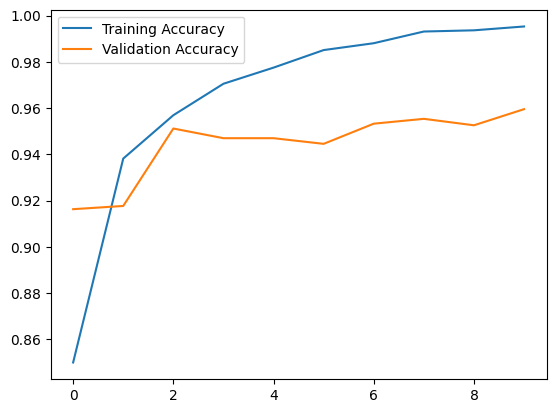

In [11]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In the plot, the blue line shows the training accuracy, which steadily increases throughout training. The orange line represents the validation accuracy, which fluctuates slightly but still shows an overall upward trend. By the end of training, the model reaches about 96.81% training accuracy and 97.13% validation accuracy, indicating strong performance and good generalization on unseen data.

**Make Predictions**

Now that the model is trained, we can use it to make predictions on new data. We load the test dataset, apply the same preprocessing steps as before, and then pass it through the model to generate predictions.

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


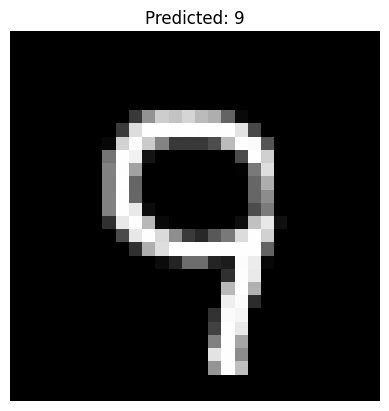

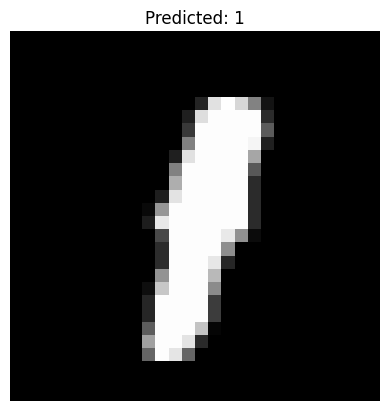

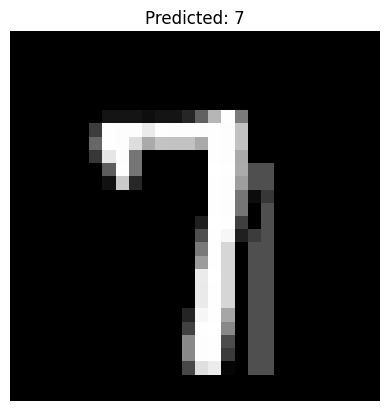

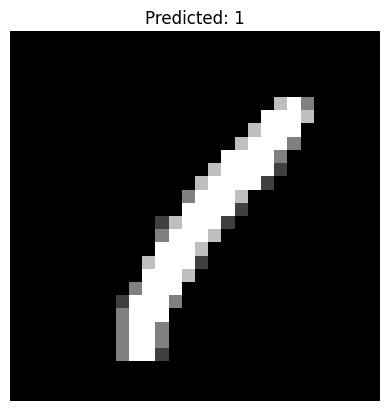

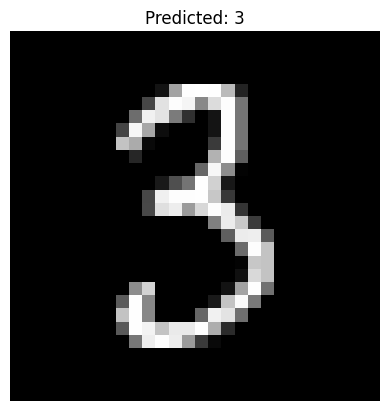

In [14]:
test_data = pd.read_csv('/content/test.csv')
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()

Using a neural network, we successfully trained a model on a dataset of 42,000 handwritten digits and achieved strong accuracy. The model was able to generalize well, meaning it could recognize digits it had never seen before. This entire process demonstrates how machine learning—especially neural networks—can be effectively applied to real-world image recognition tasks.